In [2]:
import numpy as np
import pandas as pd

from PyEyeSim import EyeData

In [3]:
import sys
sys.path.append('C:/Users/nickp/Documents/GitHub/PersonalRepo/PyEyeSim/PyEyeSim/')
import hmmanalysis as GHMM

Fitting Gaussian Mixture Model (GMM) for one stimulus:

- First we collect all the fixation points for one stimulus and fit a GMM to the data. 
- Than we use the model to generate new fixation points.
- Using the simulation we can fit again a GMM.
- In the end we compare in a matrix the likelihood of the fit and the simulation.

In [2]:
Path = 'C:\\Users\\nickp\\Documents\\Courses\\P1\\EyeMovementDat\\'
FilePath='C:\\Users\\nickp\\Documents\\Courses\\P1\\EyeMovementDat\\FixDatUrban.csv'

FixData=pd.read_csv(FilePath)
print(np.shape(FixData))

(29324, 17)


In [3]:
FixData

Unnamed: 0  SUBJECTINDEX  age  answer  catch  category  dataset_nr  \
0             105           1.0  2.0     1.0    0.0       8.0         0.0   
1             106           1.0  2.0     1.0    0.0       8.0         0.0   
2             107           1.0  2.0     1.0    0.0       8.0         0.0   
3             108           1.0  2.0     1.0    0.0       8.0         0.0   
4             109           1.0  2.0     1.0    0.0       8.0         0.0   
...           ...           ...  ...     ...    ...       ...         ...   
29319      105725          58.0  1.0     0.0    0.0       8.0         0.0   
29320      105726          58.0  1.0     0.0    0.0       8.0         0.0   
29321      105727          58.0  1.0     0.0    0.0       8.0         0.0   
29322      105728          58.0  1.0     0.0    0.0       8.0         0.0   
29323      105729          58.0  1.0     0.0    0.0       8.0         0.0   

          end  filenumber   fix  on_image  patchpos   start  trial  valid  \
0       656.0        38.0   1.0       1.0     633.0   490.0    7.0    1.0   
1       908.0        38.0   2.0       1.0    1008.0   722.0    7.0    1.0   
2      1166.0        38.0   3.0       1.0     633.0   946.0    7.0    1.0   
3      1436.0        38.0   4.0       1.0    1008.0  1224.0    7.0    1.0   
4      1722.0        38.0   5.0       1.0     633.0  1492.0    7.0    1.0   
...       ...         ...   ...       ...       ...     ...    ...    ...   
29319  4283.0        63.0  19.0       1.0     256.0  4065.0  124.0    1.0   
29320  4465.0        63.0  20.0       1.0     558.0  4313.0  124.0    1.0   
29321  4691.0        63.0  21.0       1.0     256.0  4513.0  124.0    1.0   
29322  4881.0        63.0  22.0       1.0     558.0  4717.0  124.0    1.0   
29323  5071.0        63.0  23.0       1.0     256.0  4901.0  124.0    1.0   

           mean_x     mean_y  
0       397.92910  666.52770  
1       887.92660  652.97120  
2      1028.11320  561.21210  
3       733.53345  746.76150  
4       371.01990  589.24677  
...           ...        ...  
29319   690.36060  784.64430  
29320   800.40640  734.00770  
29321  1101.67090  493.60037  
29322  1153.76810  456.48746  
29323  1204.77330  441.63837  

[29324 rows x 17 columns]

In [4]:
sizeX,sizeY=1280,960
UrbanDat=EyeData('UrbanDat','Within',FixData,sizeX,sizeY)
UrbanDat.DataInfo(FixDuration='length',Stimulus='filenumber',subjectID='SUBJECTINDEX',StimPath=Path+'8/',StimExt='.png')
UrbanDat.RunDescriptiveFix()

dataset size:  (29324, 17)
study design:  Within
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 58 subjects, and 64 stimuli
stimuli loaded succesfully, access as self.images
Data for  58 observers and  64  stimuli.


c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Mean fixation number:  15.81  +/-  2.36
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  1855
Mean X location:  640.5  +/-  43.7  pixels
Mean Y location:  475.6  +/-  37.3  pixels
Mean saccade  amplitude:  253.5  +/-  43.8  pixels
Mean scanpath  length:  3753.2  +/-  873.2  pixels


(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58.]))

In [5]:
components = list(range(2, 11))
components

[2, 3, 4, 5, 6, 7, 8, 9, 10]

## Starting Test - Compare score method

In [6]:
# get 5 random sample from UrbanDat.stimuli
list_stim = UrbanDat.stimuli.tolist()
np.random.seed(42)
sample_stimuli = np.random.choice(list_stim, 5)
sample_stimuli = [int(i) for i in sample_stimuli]
np.random.seed()
print(sample_stimuli)

[39, 52, 29, 15, 43]


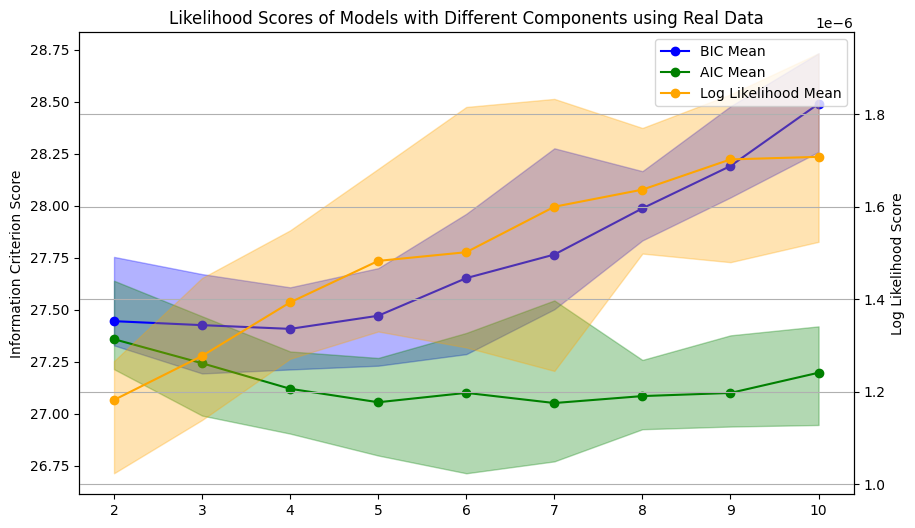

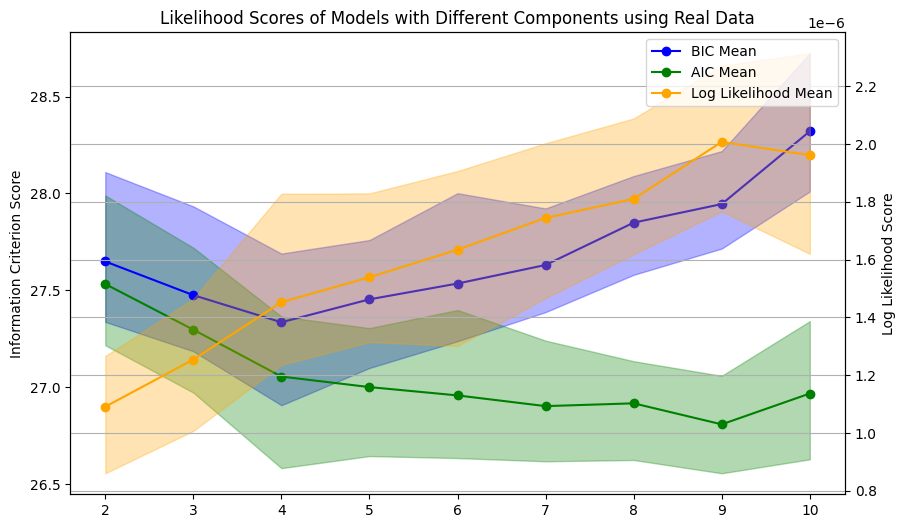

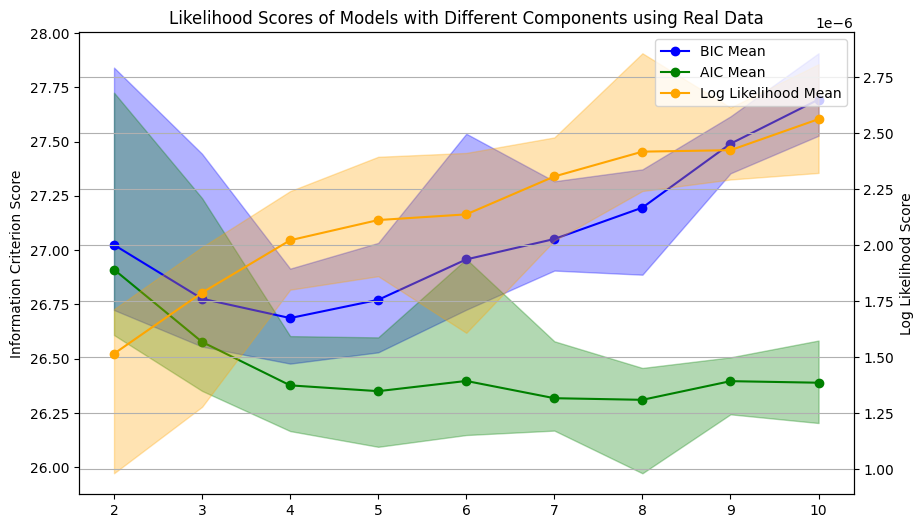

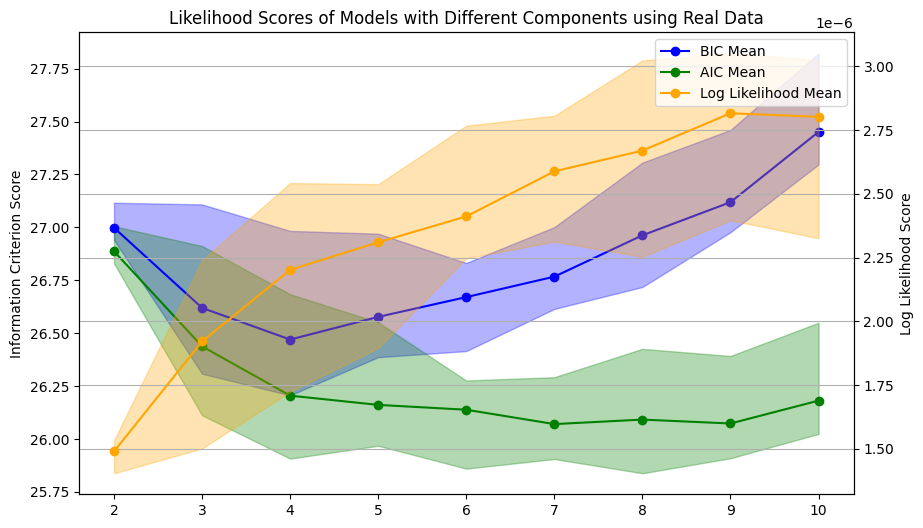

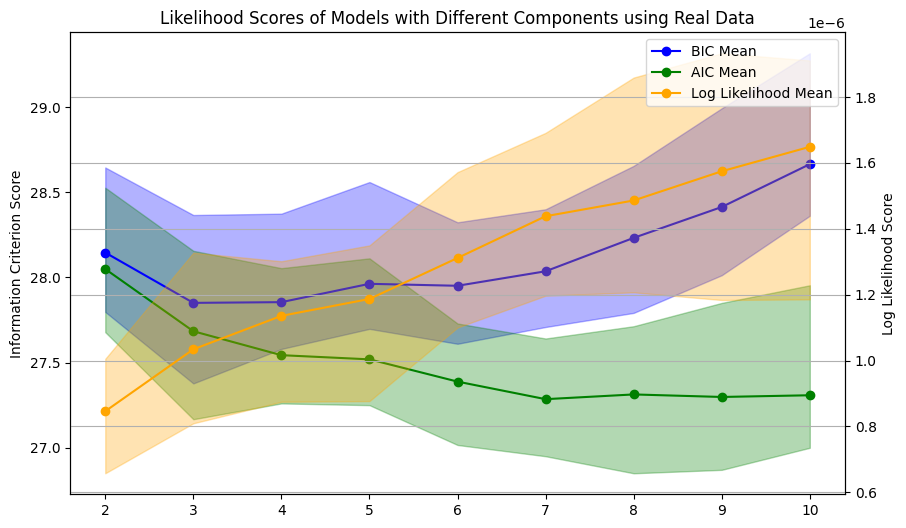

In [7]:
results = GHMM.GaussianHMMPipeline(UrbanDat, sample_stimuli, components, starting_tests=15, only_starting=True, only_bic=False)

We can see that for a lot of stimuli using the aic score the simulation show a better fit when the number of components is higher, in praticular higher number of component perform better or the same with lower one and this is not helpful at all to find robust and generalizable model.

In general also for the log likelihood the simulation show a better fit with the increase of the number of components.

Instead for the bic score we can see that the results are more interesting, in fact the simulation show that not always higher or lower number of components perform better, but there is a range of number of components that perform better.

With AIC we could try to find the best model identifying an elbow in the plot of the AIC score, but this is not always possible and the result could be not generalizable.

For this reason we choose to proceed using the BIC as starting method to analyze the model performance.

## Fixation points and randomness in Hidden Markov Model (HMM)

When there is low data in an HMM, it can lead to several challenges and limitations:

1. Parameter Estimation: HMMs rely on estimating the transition probabilities between states and the emission probabilities of observations. With low data, it becomes difficult to accurately estimate these probabilities, leading to less reliable model predictions.

2. Model Complexity: HMMs with low data may struggle to capture the underlying patterns and dynamics of the system. The model may oversimplify or overfit the available data, resulting in poor generalization to unseen data.

3. Uncertainty: With limited data, the uncertainty in the estimated parameters increases. This uncertainty can propagate through the model, affecting the accuracy of state predictions and the overall simulation results.

To address these challenges, one approach is to fitting the HMM with all the data available and then use the model to generate new data points. By simulating new data points, we can increase the effective sample size and improve the estimation of the model parameters. This can lead to more robust and generalizable HMMs that better capture the underlying dynamics of the system.

In the pipeline we try to generate new data in differnet ways, following the true data distribution or using a fix number of generated data points. 

We can now compare how many data are needed to have a good fit and how the generated data can help to improve the model.

First we need to find a subset of components that perform bettter over multiple iterations:
 - We fit multiple times the models using the original data.
 - Then we use BIC to find the best number of components.

We compare the distribution of the results to get only the components that perform better in most of the cases.

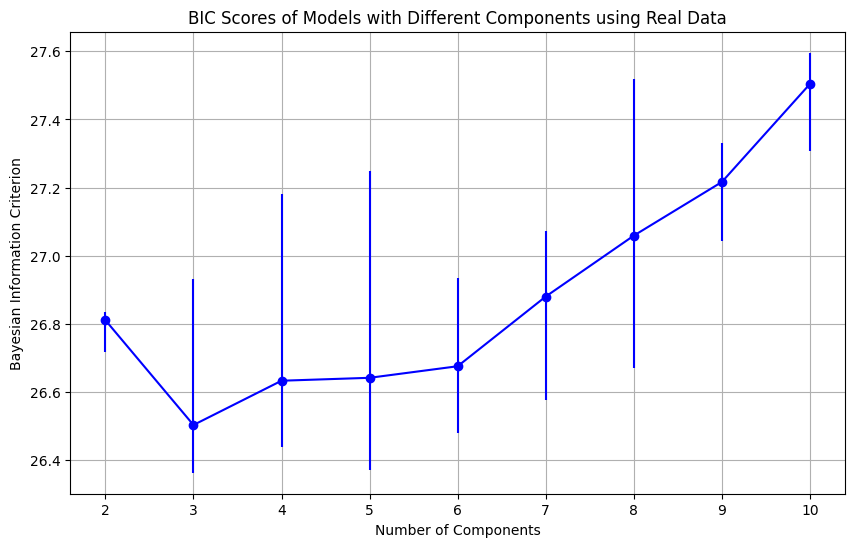

stimns found: [0] 1
   Stimulus Best Model (Min BIC) Best Model (Mean + Standard Deviation)  \
0         1            [3, 5, 4]                              [2, 3, 6]   

    Entropy  
0  4.835396  


In [71]:
results = GHMM.GaussianHMMPipeline(UrbanDat, 1, components, starting_tests=10, only_starting=True, only_bic=True, only_best=True, threshold=0.4)

We can see that with only 10 iteration is quite difficult to select exactly the components and the result can easily change with new test.

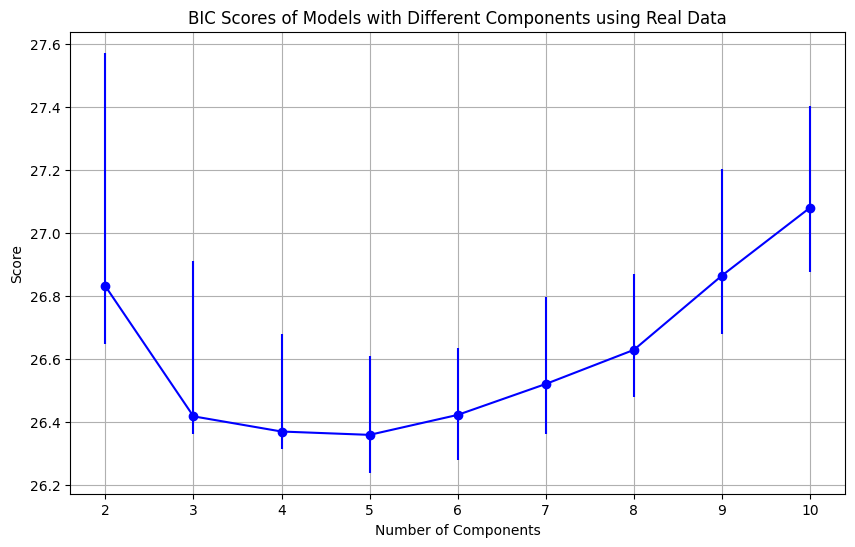

stimns found: [0] 1
   Stimulus Best Model (Min BIC) Best Model (Mean + Standard Deviation)  \
0         1            [5, 6, 4]                              [4, 5, 6]   

    Entropy  
0  4.835396  


In [10]:
results = GHMM.GaussianHMMPipeline(UrbanDat, 1, components, n_iter=100, starting_tests=100, only_starting=True, only_bic=True, only_best=True, threshold=0.4)

With an higher number of iteration finally we obtain a stable result and we can select the best n components, based on the threshold.

We can than extract the pre-trained model and use it to the next step of the pipeline.

In [15]:
components = [model.n_components for model in results[0]]

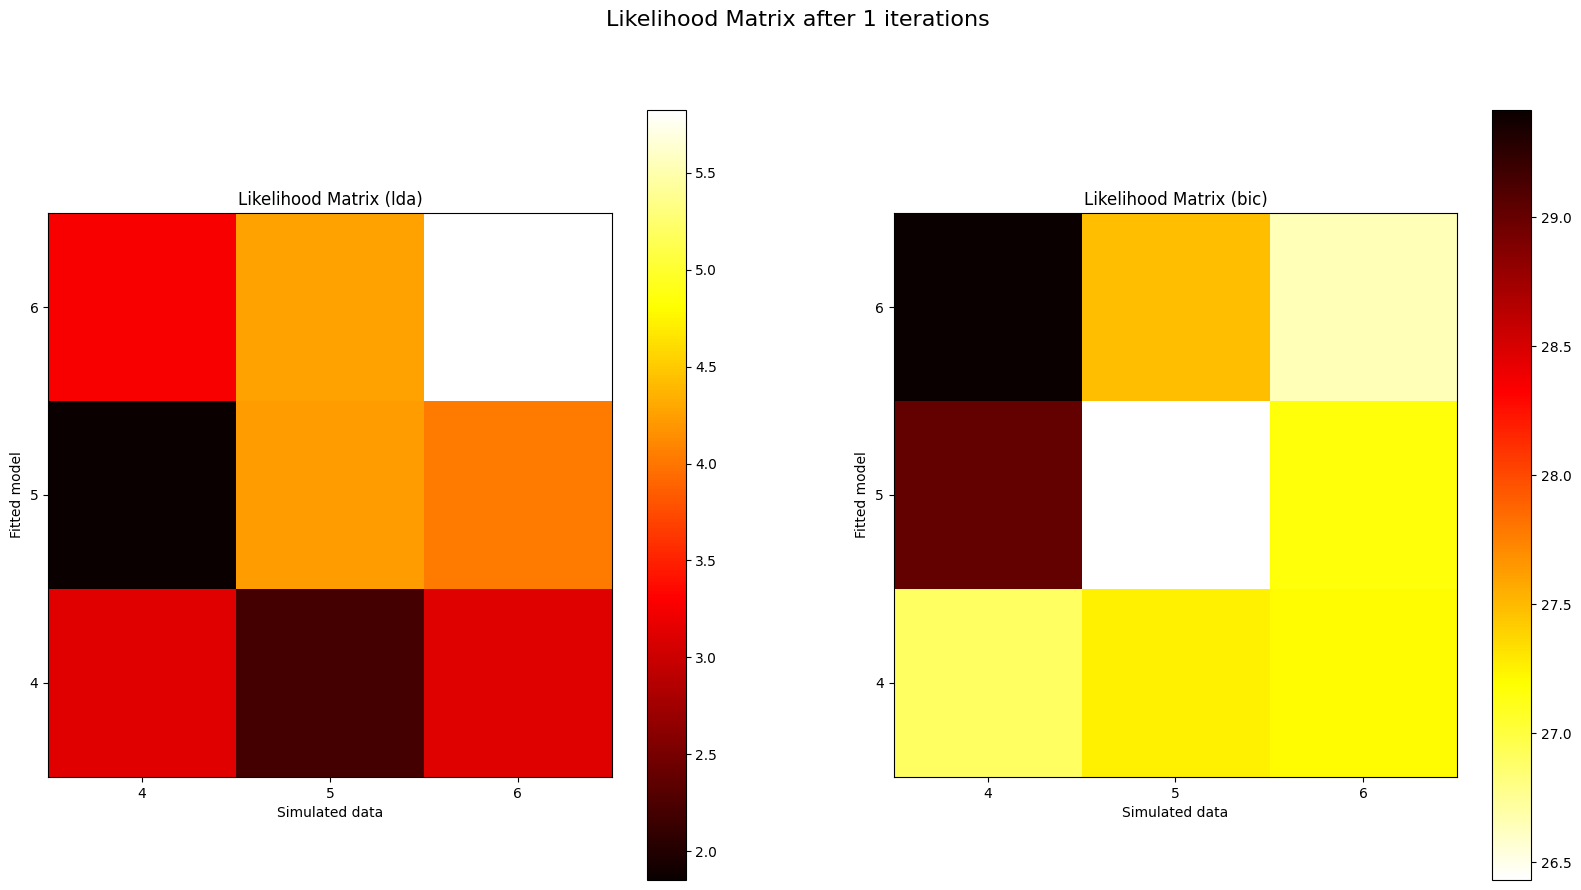

stimns found: [0] 1


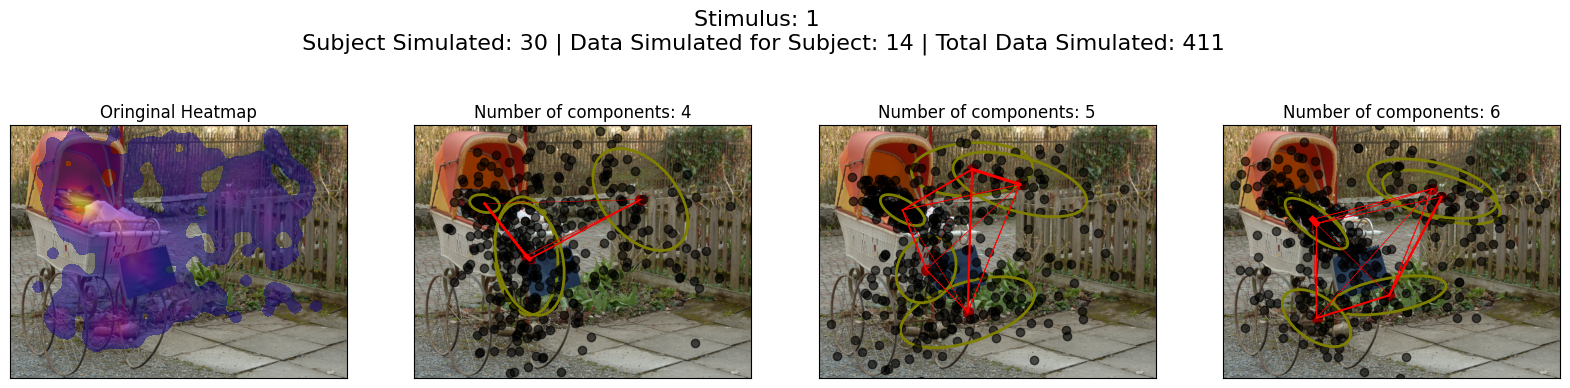

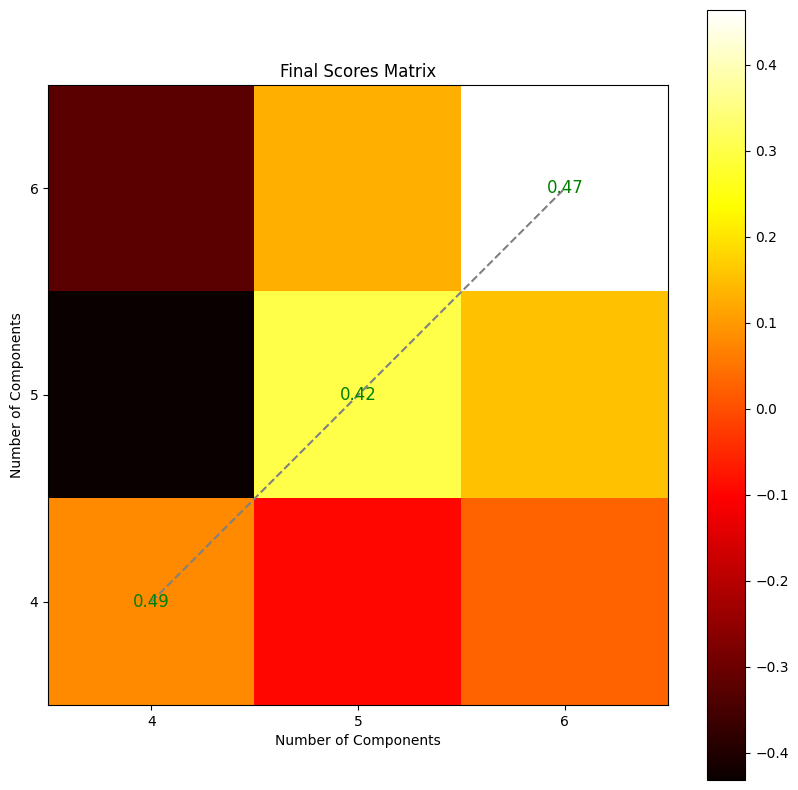

In [11]:
model_list = results[0]
GHMM.GaussianHMMPipeline(UrbanDat, 1, components, simulation_type='random', evaluation=['lda','bic'], n_iter=1000, iteration=1, only_bic=True, models=model_list, Summary=False)

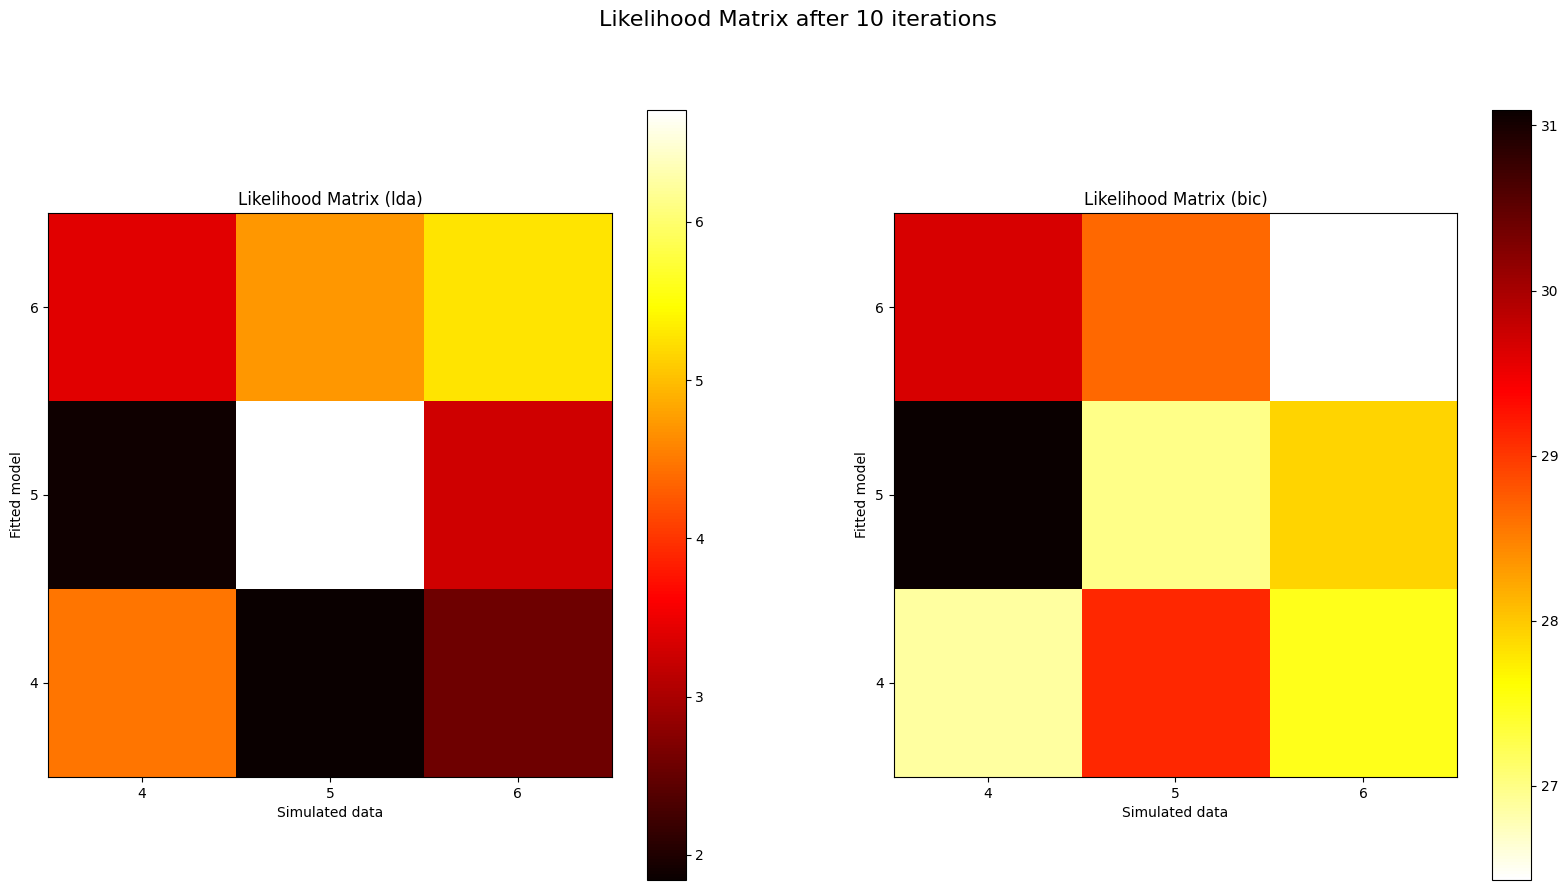

stimns found: [0] 1


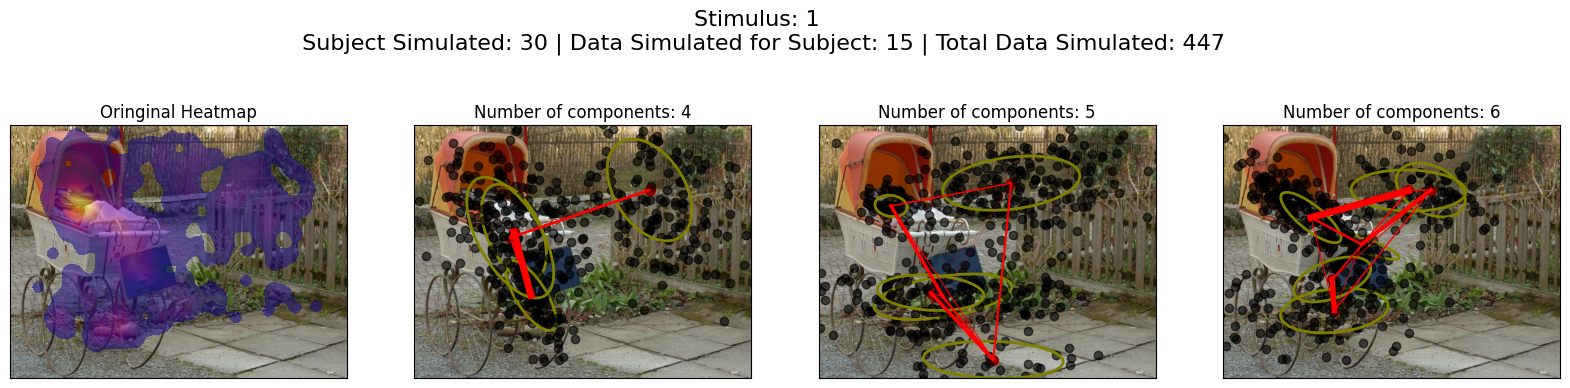

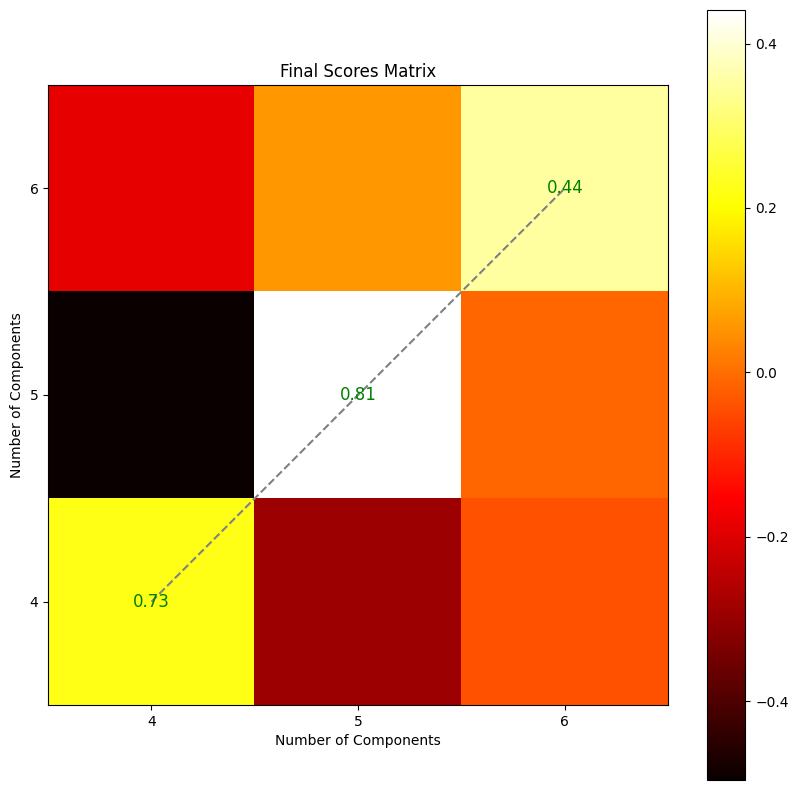

In [12]:
model_list = results[0]
GHMM.GaussianHMMPipeline(UrbanDat, 1, components, simulation_type='random', evaluation=['lda','bic'], n_iter=1000, iteration=10, only_bic=True, models=model_list, Summary=False)

With few generated data the result can differ a lot between different runs, this because the generation process of the HMM is really random and every run we can finish with different hiden states (like we can see in the plot of the simulated data with 5 components).

In the end is necessary first to increase the number of generated data points, in order to obtain a more stable result between different runs and then to increase the number of iteration to let the LDA score to converge in one solution that is more generalizable.

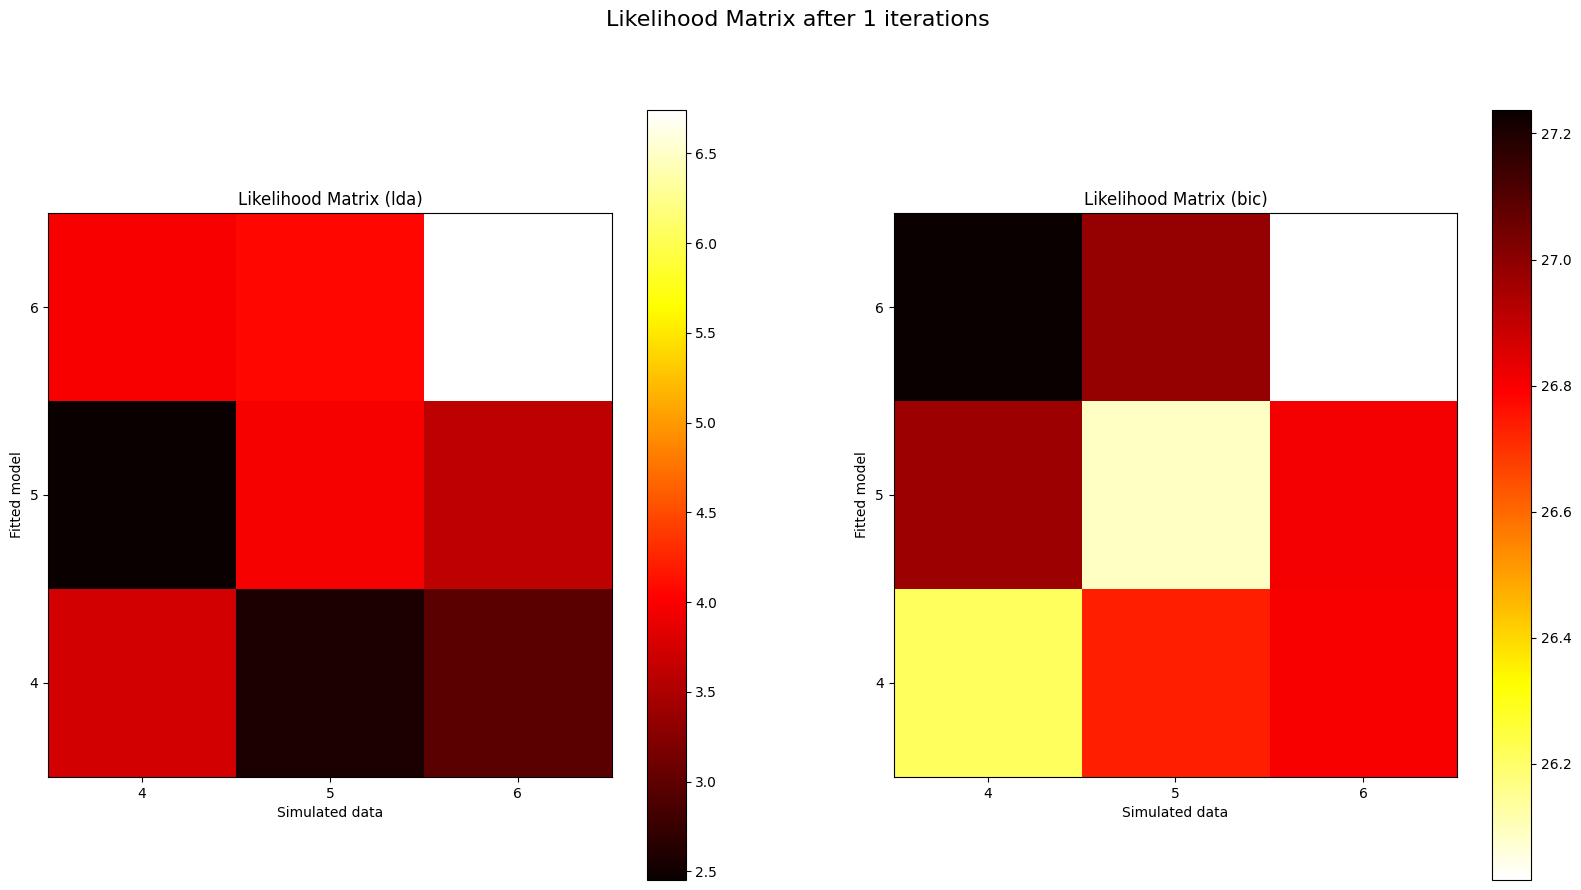

stimns found: [0] 1


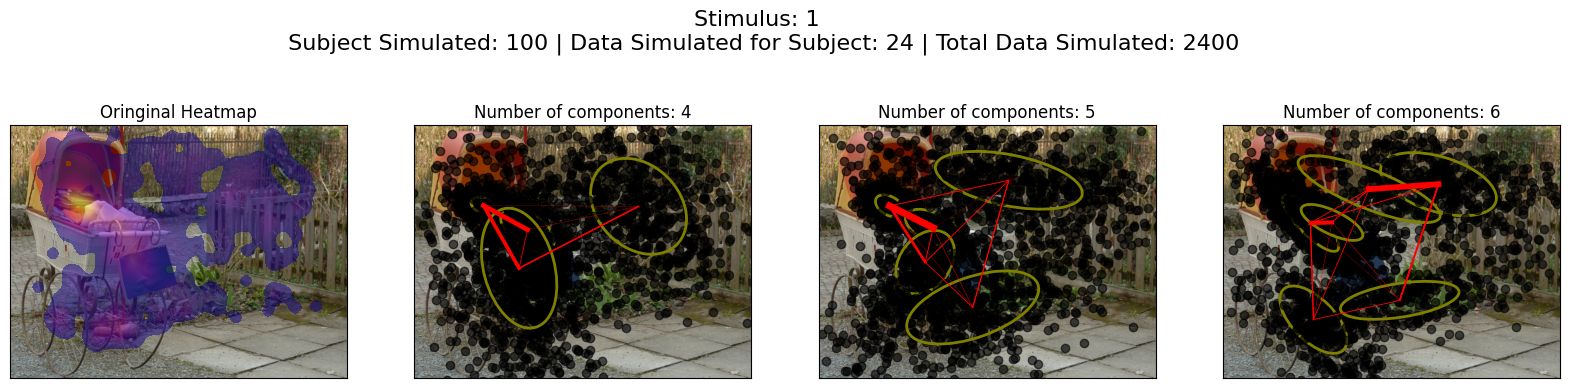

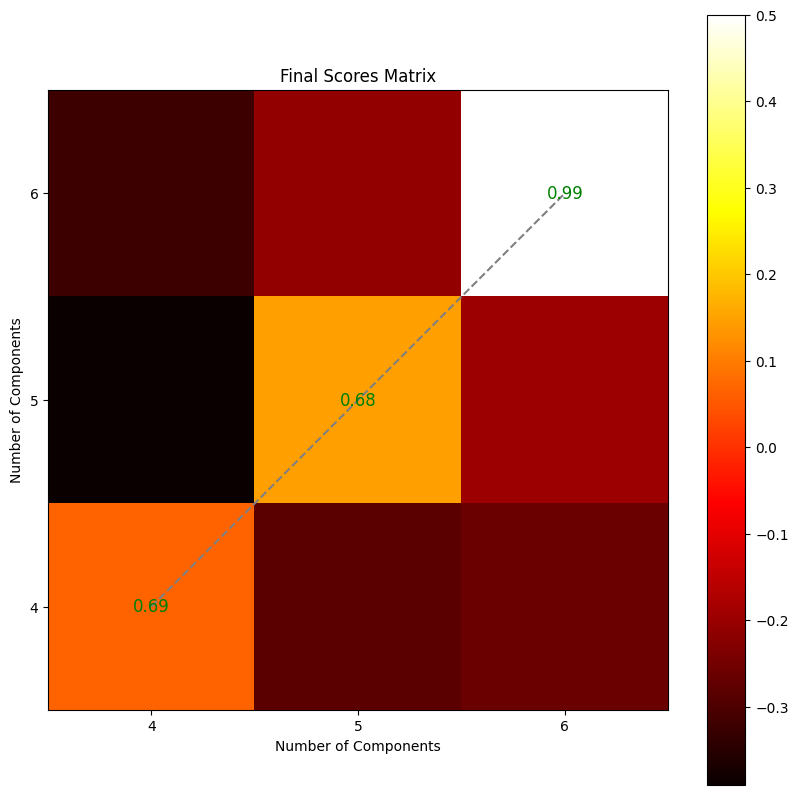

In [9]:
model_list = results[0]
GHMM.GaussianHMMPipeline(UrbanDat, 1, components, simulation_type=2400, evaluation=['lda','bic'], n_iter=1000, iteration=1, models=model_list,  Summary=False)

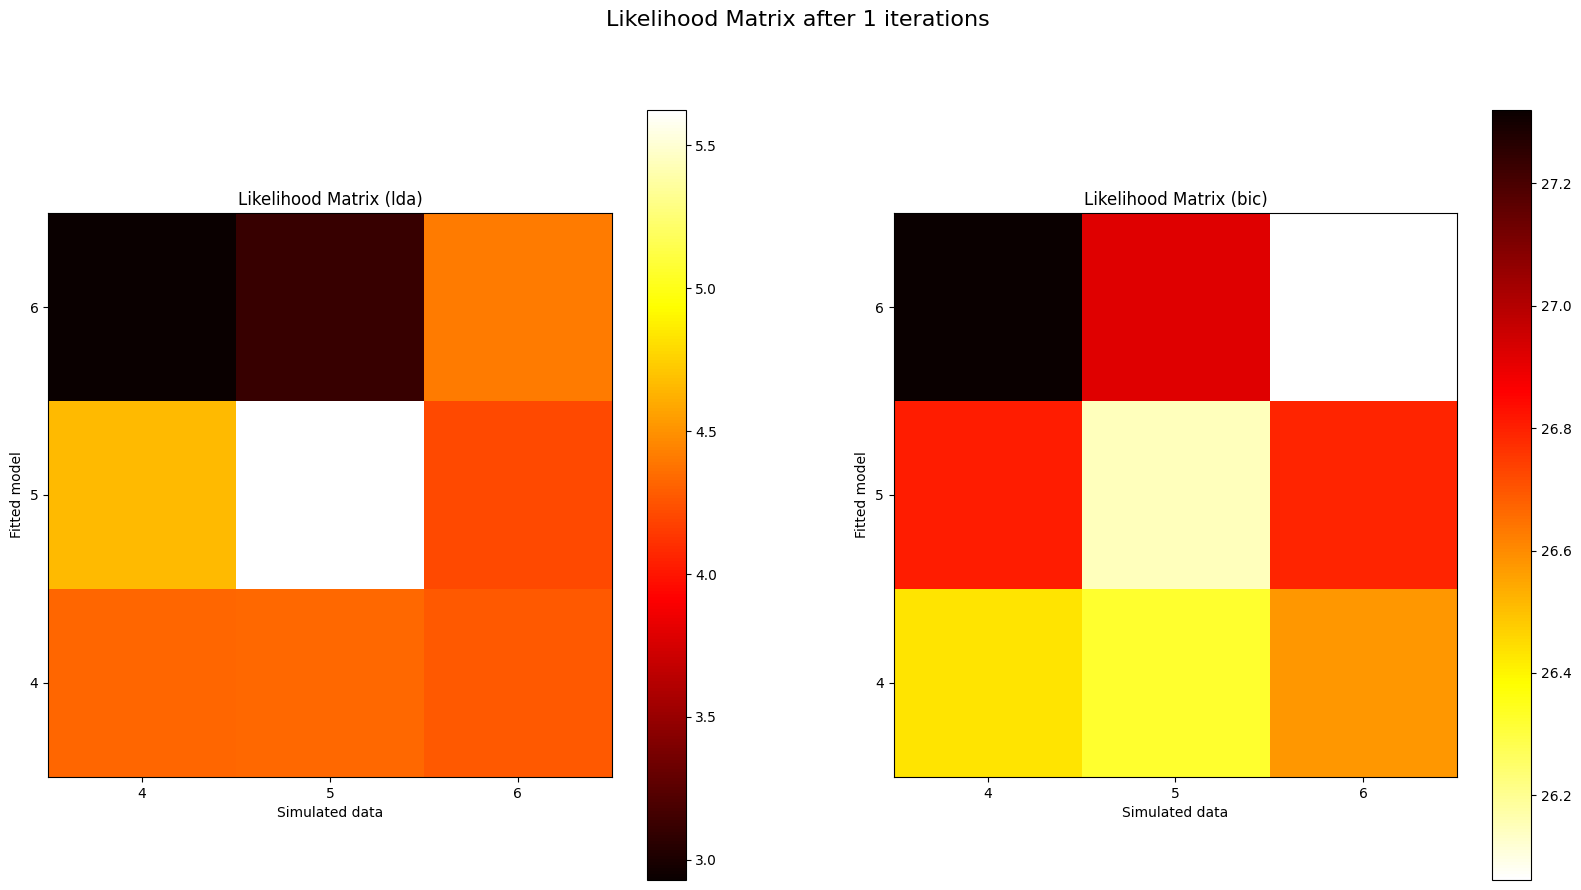

stimns found: [0] 1


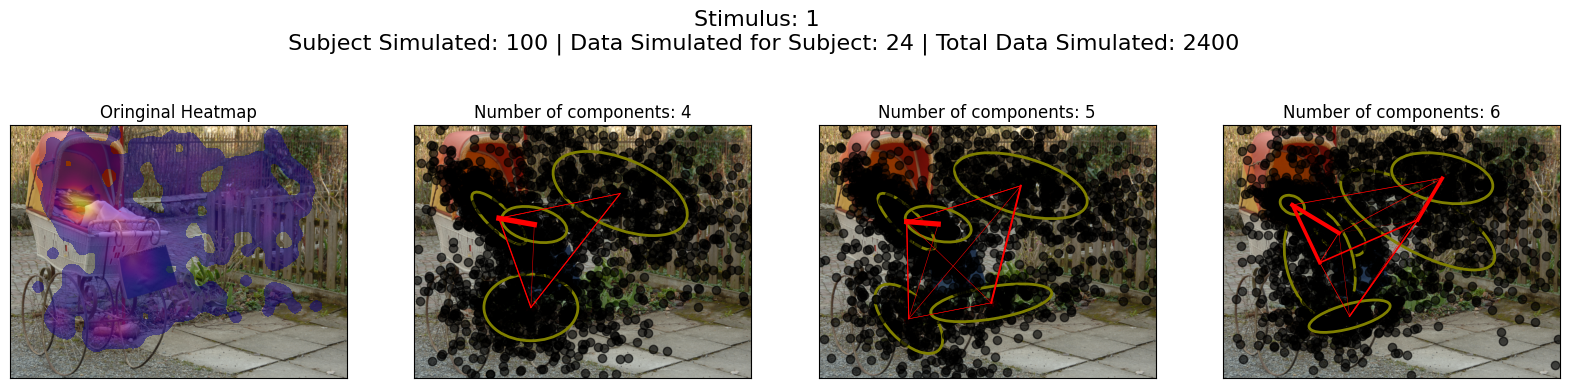

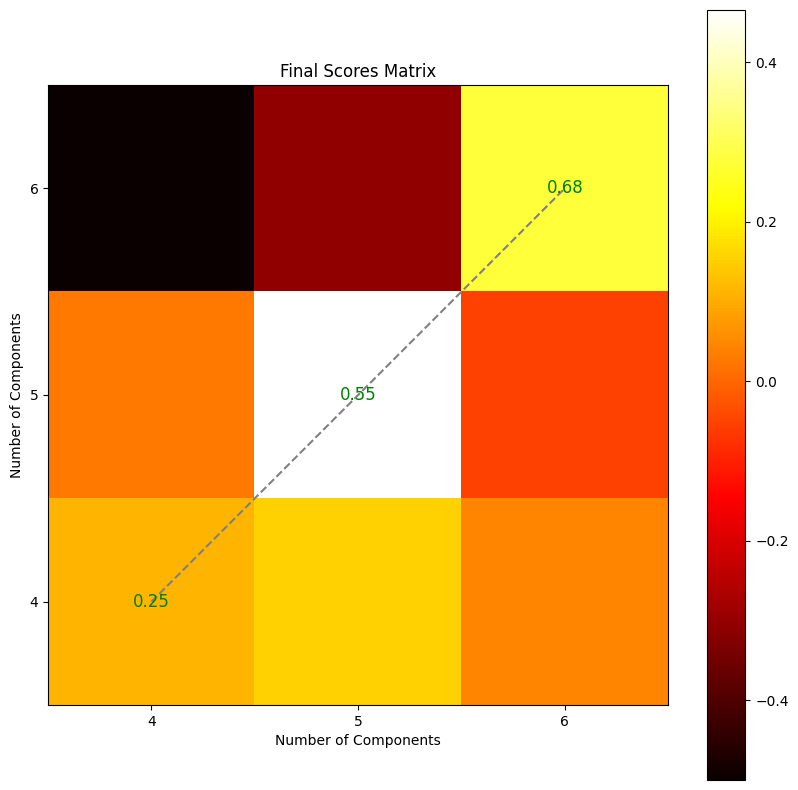

In [17]:
model_list = results[0]
GHMM.GaussianHMMPipeline(UrbanDat, 1, components, simulation_type=2400, evaluation=['lda','bic'], n_iter=1000, iteration=1, models=model_list,  Summary=False)

Here instead we can see that with more data point the plot of the simulated data is more stable, the region are always the same (or change less compared to the 'random' method).

The problem still that the LDA score is not always the same, this because its easy that in only one run the separation between the two regions is not perfect and this can lead to a different score.

The solution is not to increase the number of generated data points, because this can lead to an overfitted solution; but instead we can repeat the process more times and take the average of the LDA score.

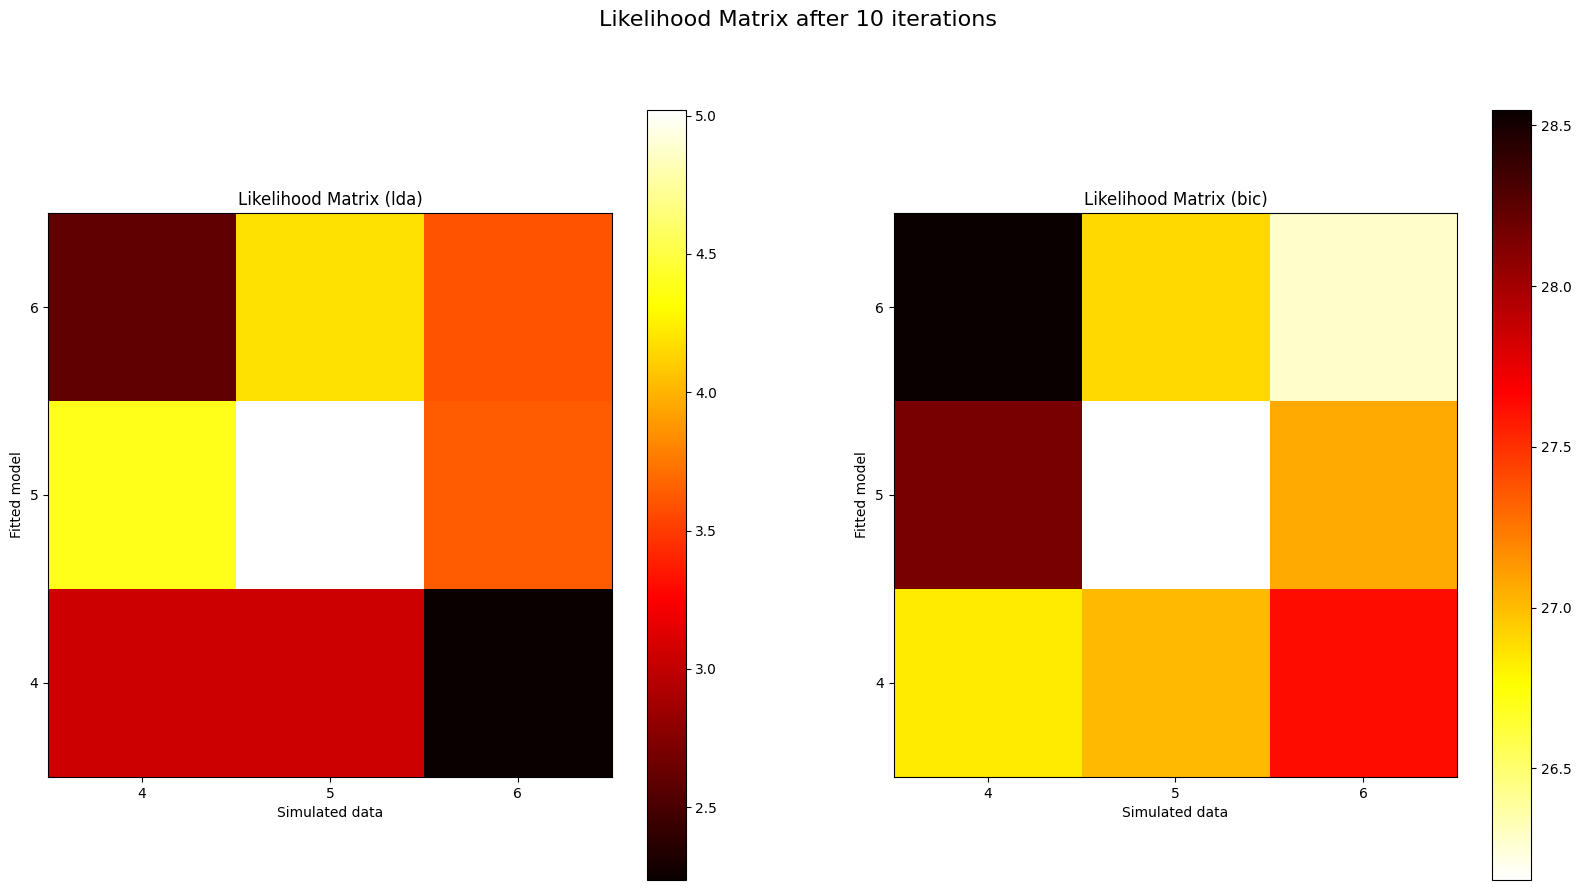

stimns found: [0] 1


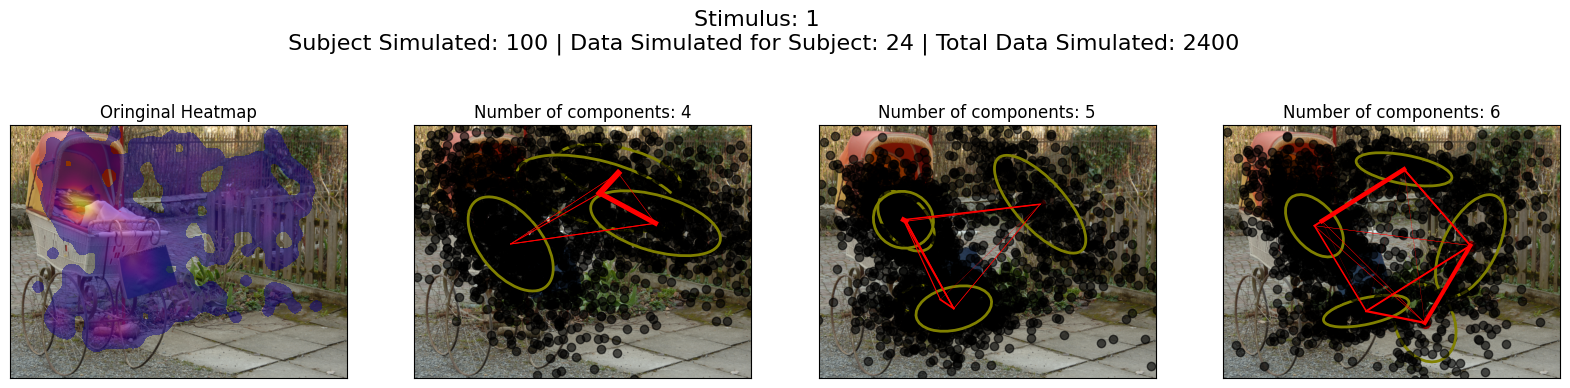

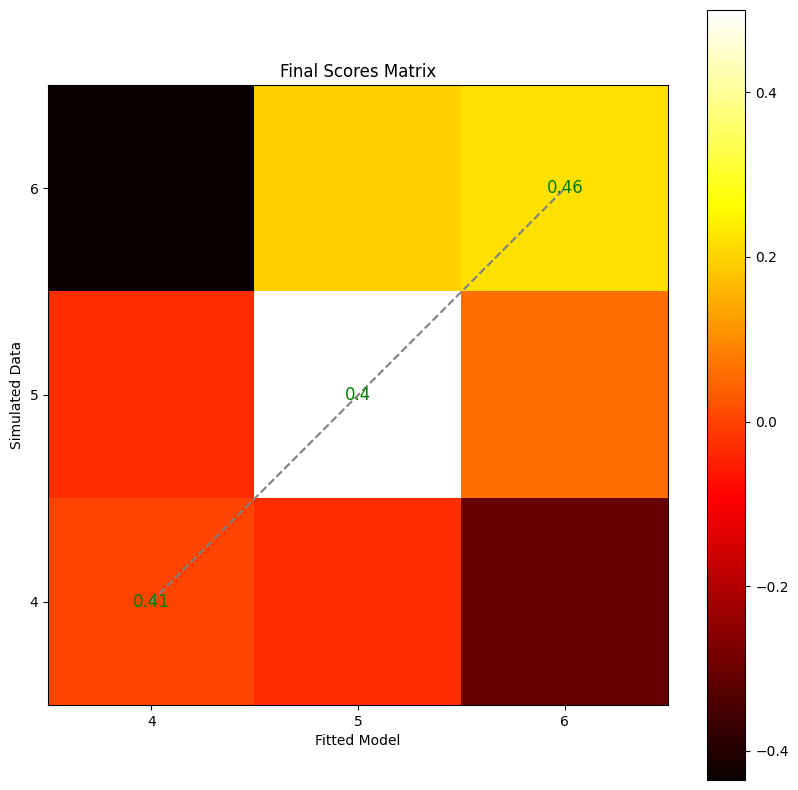

In [12]:
model_list = results[0]
GHMM.GaussianHMMPipeline(UrbanDat, 1, components, simulation_type=2400, evaluation=['lda','bic'], n_iter=1000, iteration=10, models=model_list,  Summary=False)

Now finally we can see that the LDA score is more stable.

In the end is possible to compare the result of the 'Final Score Matrix', first the solution with the lighter color is the best one in concordance between 'LDA' and 'BIC' (were the influence of LDA is bgger as BIC is already stable from the previous step of the pipeline).

Also we can consider the result of the anti-diagonal compared to the other cells, if the anti-diagonal is higher than the other cells in the same column (that it means that the simulation is fit better with the correct number of components) we can consider the result as good and we will print the score of the cell compared with the other in the same column and row (more a value is better and the other are worst higher is the score).

Is important to consider that this value needs to be taken relatively, because the user could prefer a model with a lower number of components if this one is already good enough, for example in the case above with 4 we can see a value very close to the best one, of course if we following the process we will choose the one with 6 components, but also 4 is a good alternative.

Now we will try the same process with different stimuli

In [26]:
components = [2, 3, 4, 5, 6, 7, 8, 9, 10]

Model is not converging.  Current: -6023.086462234351 is not greater than -6019.064201984539. Delta is -4.022260249811552


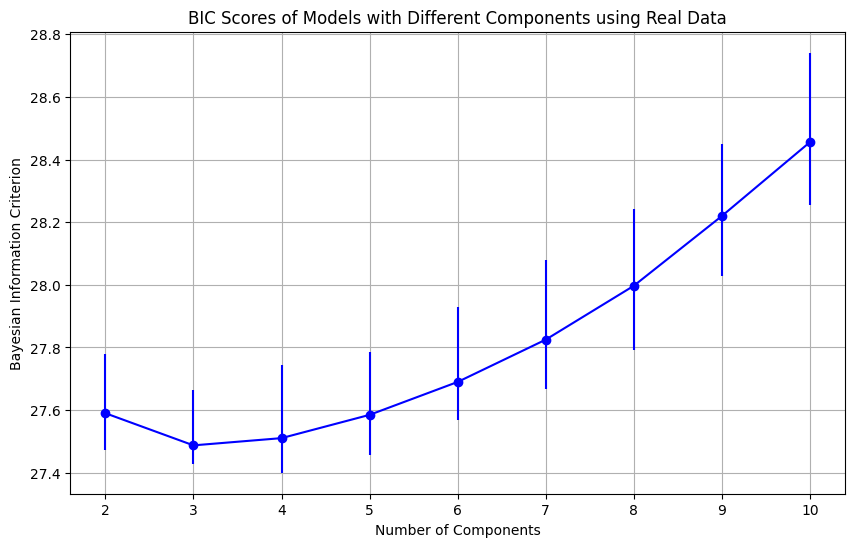

stimns found: [3] 4
   Stimulus Best Model (Min BIC) Best Model (Mean + Standard Deviation)  \
0         4            [4, 3, 5]                              [3, 4, 5]   

   Entropy  
0  5.21172  


In [6]:
results = GHMM.GaussianHMMPipeline(UrbanDat, 4, components, n_iter=1000, starting_tests=100, only_starting=True, only_bic=True, only_best=True, threshold=0.4)

In [7]:
components = [model.n_components for model in results[0]]

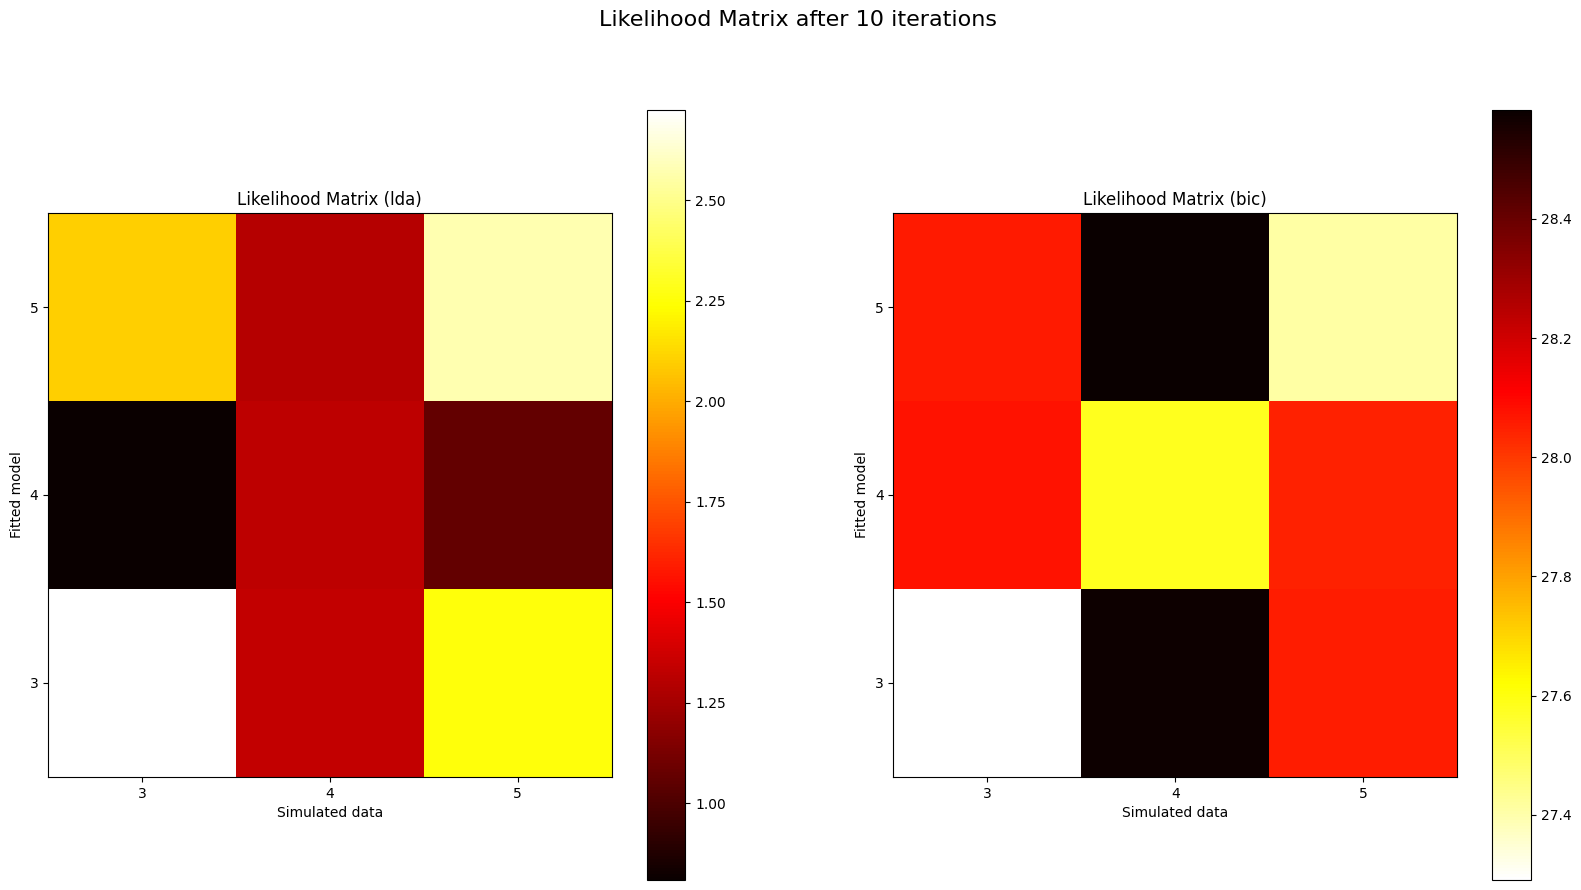

stimns found: [3] 4


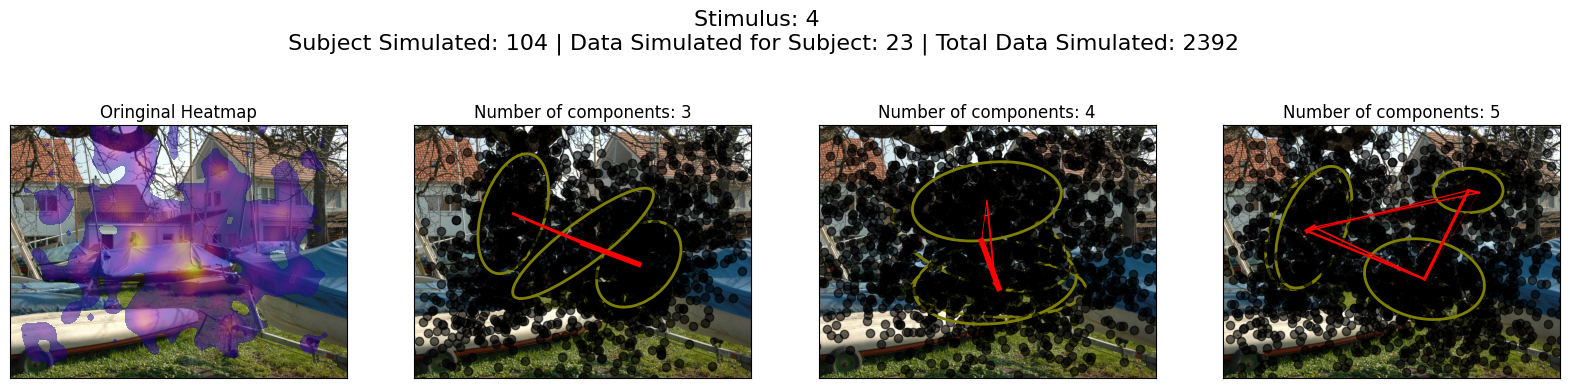

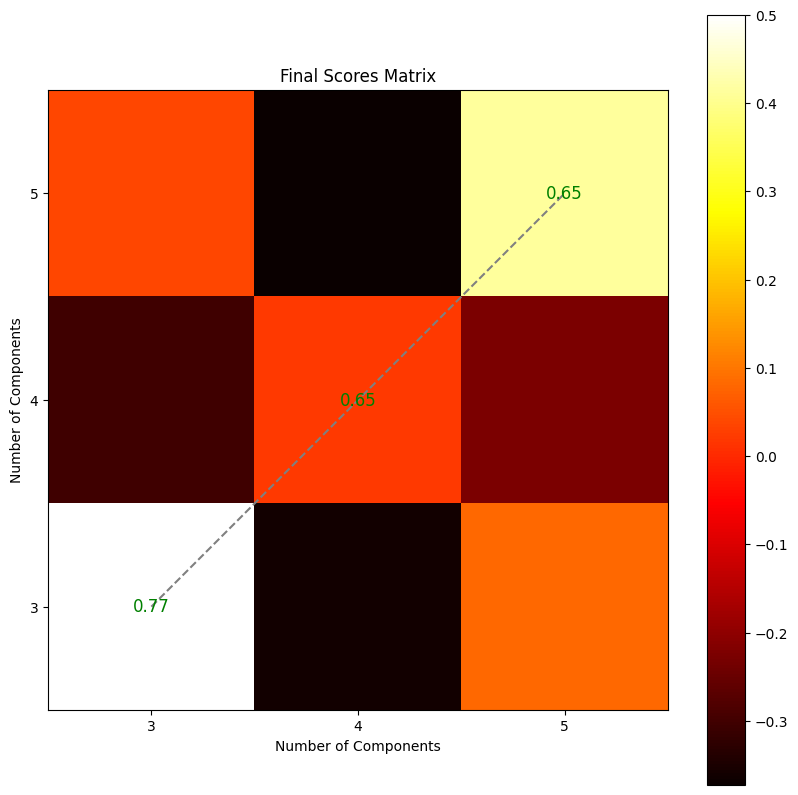

In [30]:
model_list = results[0]
GHMM.GaussianHMMPipeline(UrbanDat, 4, components, simulation_type=2300, evaluation=['lda','bic'], n_iter=1000, iteration=10, models=model_list,  Summary=False)

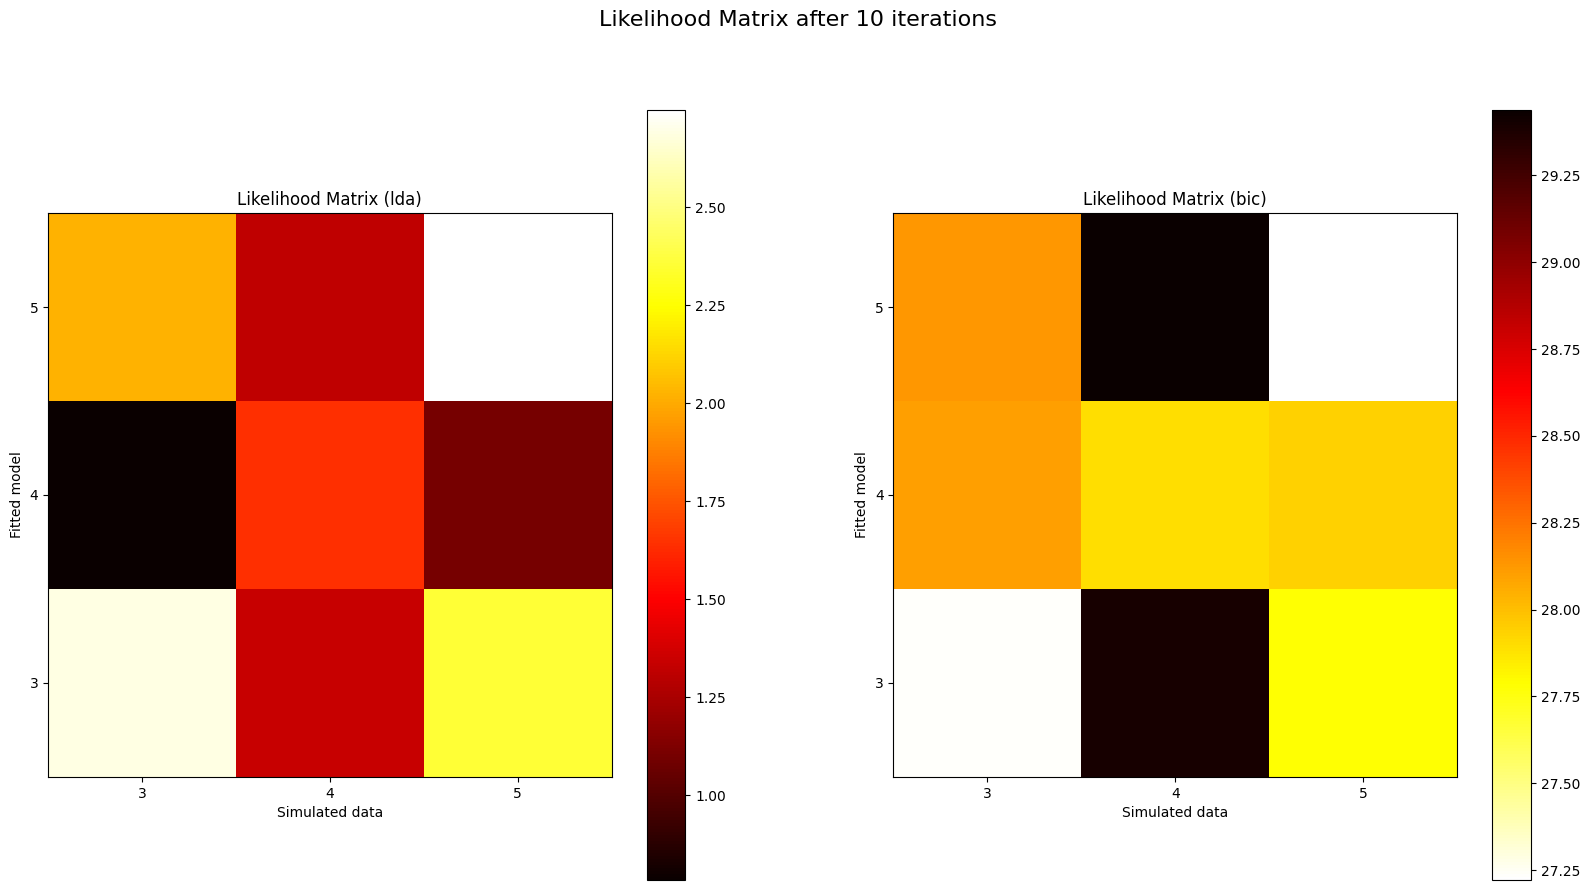

stimns found: [3] 4


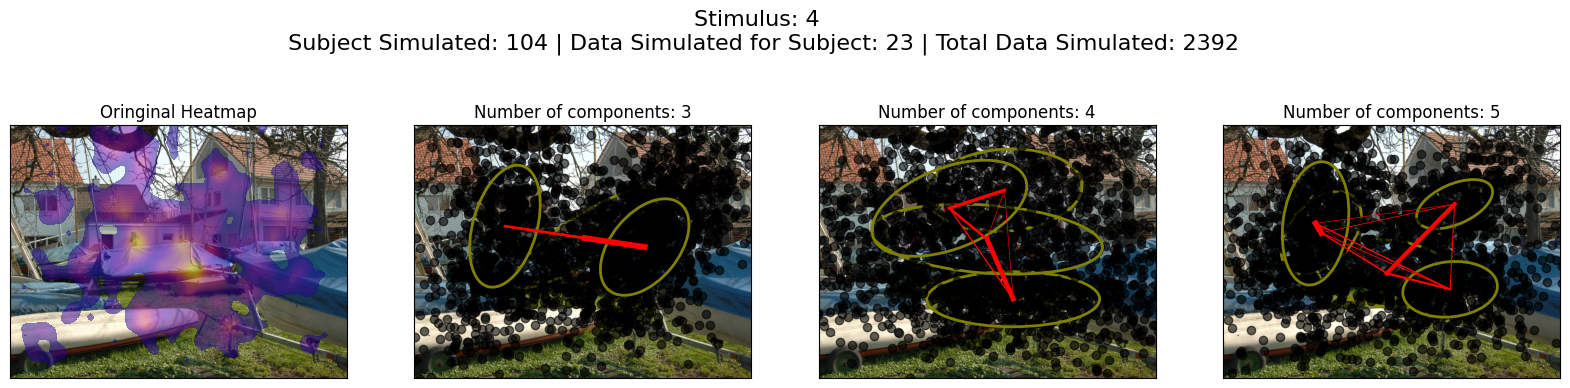

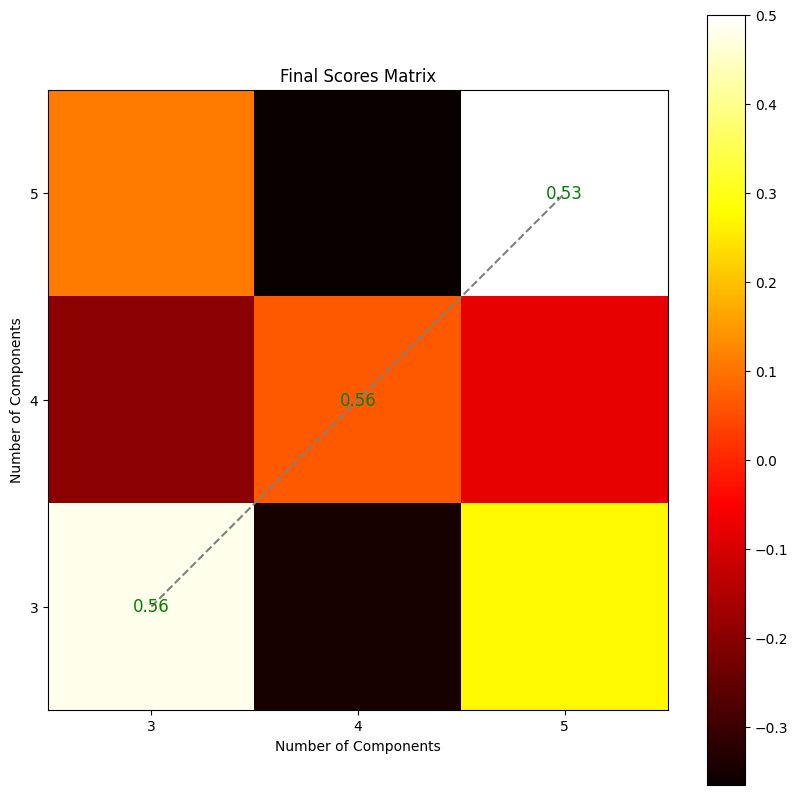

In [31]:
model_list = results[0]
GHMM.GaussianHMMPipeline(UrbanDat, 4, components, simulation_type=2300, evaluation=['lda','bic'], n_iter=1000, iteration=10, models=model_list,  Summary=False)

As we can see in this case the results are very close to each other (probably beacuse in this stimulus there are not enogh true data), and increasing only the subject and the number of iteration is not enough to decide exactly to one model.

What we can do with the pipeline is to specify both number of subjects and number of generated data points for each subject, in this way we can have a more stable and clear result.

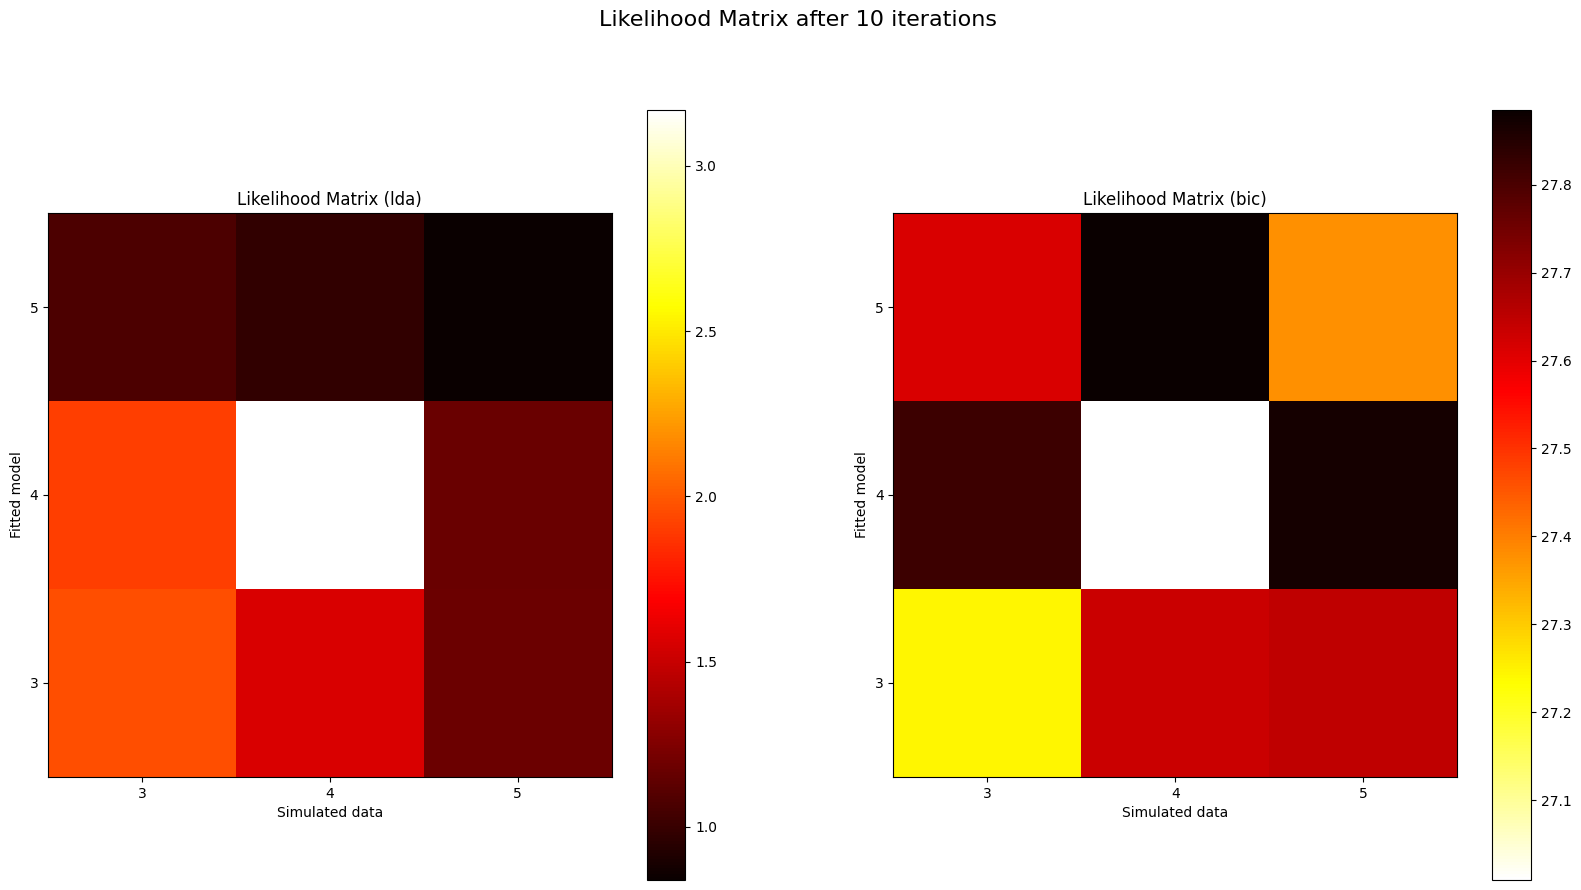

stimns found: [3] 4


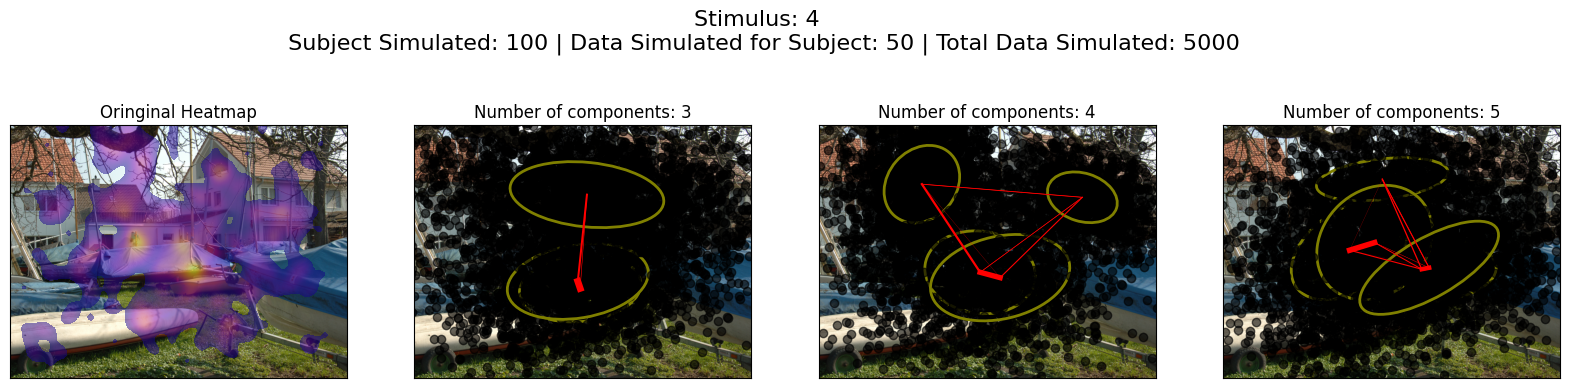

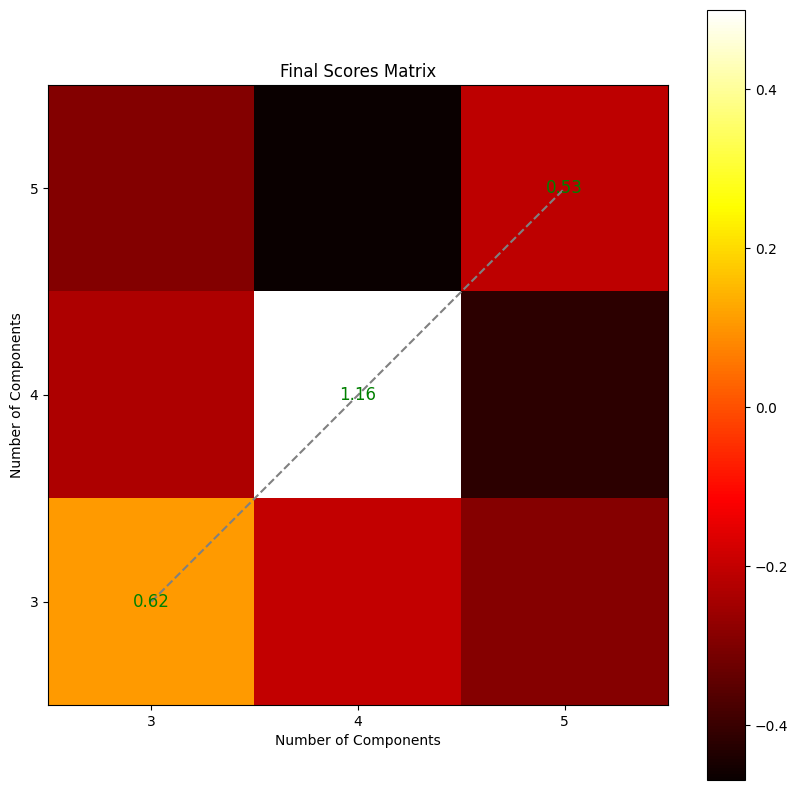

In [11]:
model_list = results[0]
GHMM.GaussianHMMPipeline(UrbanDat, 4, components, simulation_type=50, subject=100, evaluation=['lda','bic'], n_iter=1000, iteration=10, models=model_list,  Summary=False)

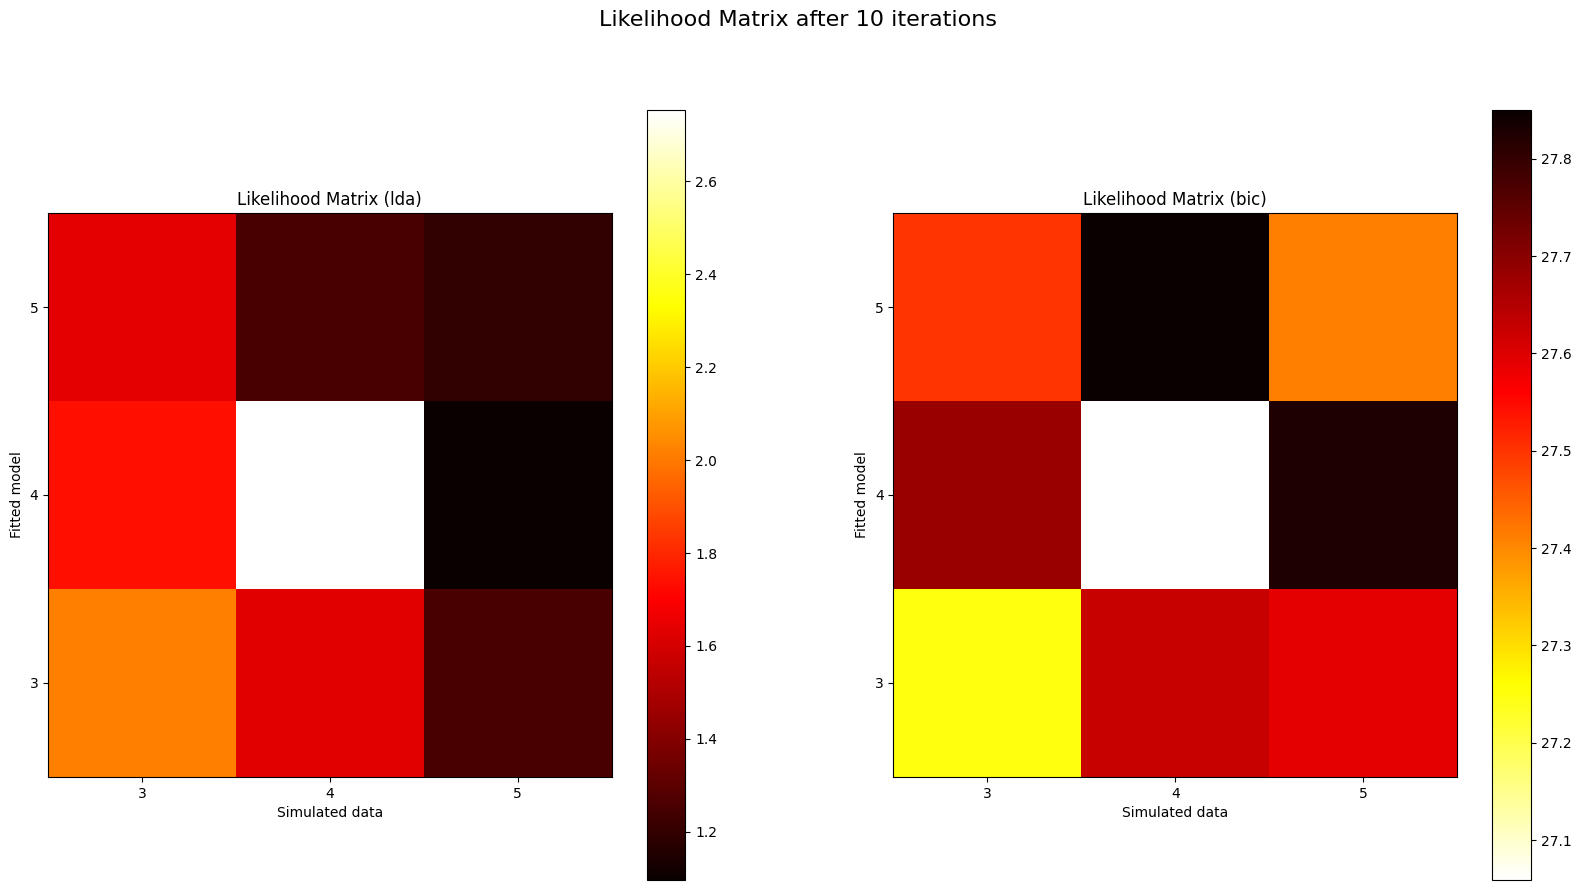

stimns found: [3] 4


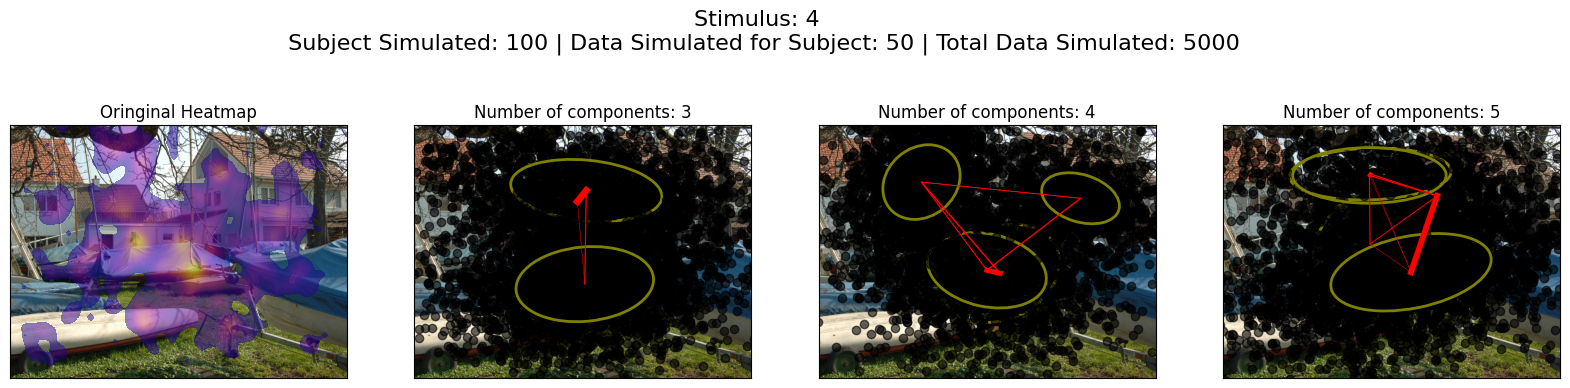

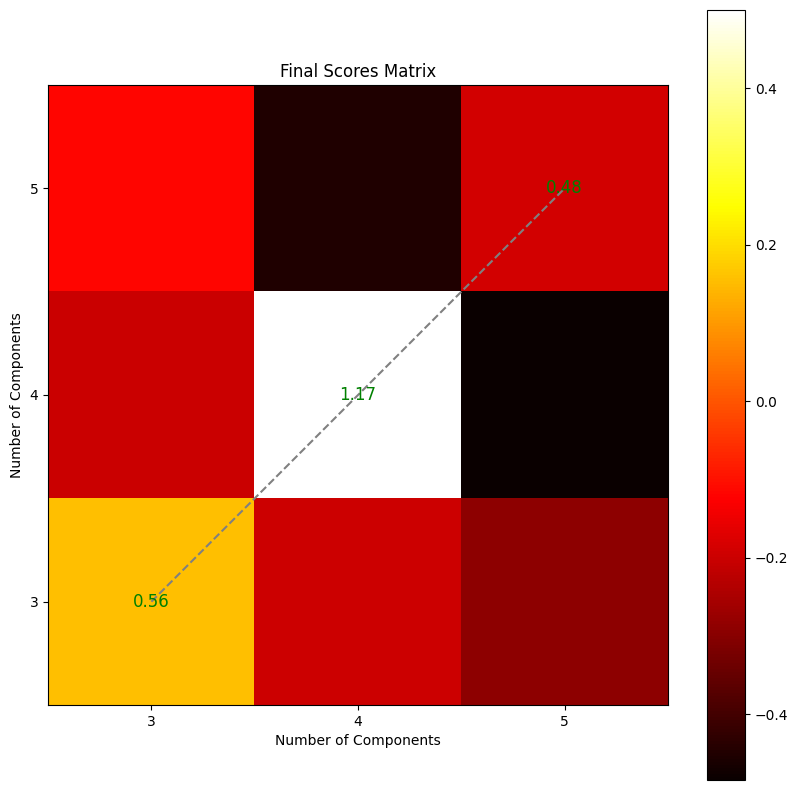

In [9]:
model_list = results[0]
GHMM.GaussianHMMPipeline(UrbanDat, 4, components, simulation_type=50, subject=100, evaluation=['lda','bic'], n_iter=1000, iteration=10, models=model_list,  Summary=False)

## Conclusion

In conclusion, the simulation of new data points can help to improve the estimation of HMM parameters and lead to more robust and generalizable models. By generating new data points, we can increase the effective sample size and improve the accuracy of the model predictions. However, it is important to carefully tune the number of generated data points to avoid overfitting and ensure that the model captures the underlying dynamics of the system. By comparing the LDA and BIC scores, we can evaluate the performance of the simulated data and select the best model for the given dataset.

To obtain the best results from the pipeline is important to find the right balance between the number of generated data points, the number of iterations, is possible to save the models and run multiple times the pipeline to see initially if the results of BIC and LDA are stable or change and than based on these result change the number of generated data points and the number of iterations.

Also another point to consider is that from all this porcess, and comparing also the Entropy of the images, we can say that the result of the Gaussi Hidden Markov Model is not possible to predict only looking at the image and starting heatmap, only that pipeline can give an idea of how many hidden state can be find by the model.